# Unsupervised Learning: Clustering



[Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)

* The task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). 

* With Supervised learning we do not have a target that we can learn from. With Supervised,  There are features that go along with the class. ML is powerful here as it uncovers patterns in the data.

Examples where its used that have no target:

* Natural Language Processing (NLP) - Getting the sentiment.
* Computer Vision
* Stock markets
* Customer / Market Segmentation
* Customer Churn
* fraud detection

## how do you cluster? 
### 4 of the many types :

### Connectivity-based clustering
* Distance based. How close are they to each other
* E.g., Hierarchical clustering - based on an object related to another object that is close by. 
 * if you live in this neighbourhood you are more like to be like the people here than in another neighborhood. 
* Distances will be represented by Dendrogram


### Centroid-based clustering
* Represents each cluster by a single mean vector. Trying to find the average in a cluster.
* E.g., k-means Clustering algorithm
* 1 catch with k-means: You do need to specify the number of clusters. So is it really supervised? 


### Distribution-based clustering
* Modeled using statistical distributions
* E.g., Multivariate normal distributions used by the expectation-maximization algorithm.


### Density-based clustering
* Defines clusters as connected dense regions in the data space.
* E.g., DBSCAN

[MLXTEND](http://rasbt.github.io/mlxtend/)


*** 

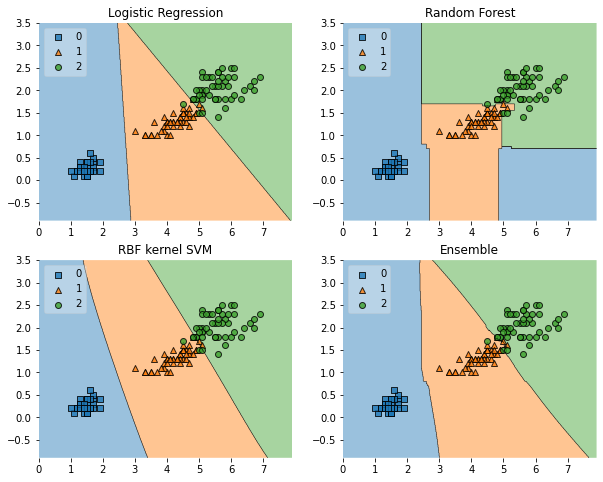

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier  # used to vote the ensemble
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[2, 3]] # make your X 1 and 3 perhaps? 

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.fig=(12,10)
plt.show()

***

# Ward’s Agglomerative Hierarchical Clustering

Agglomeration: a large group of many different things collected or brought together: 

[Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_clustering)

Wards' can work in two different ways:
* Agglomerative: 
  * Bottom up
  * Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

* Divisive: 
  * Top down
  * All observations start in one cluster, and splits ( like a Decision Tree) are performed recursively as one moves down the hierarchy.

So how does it actually do it ? IT uses a distance matrix. Similar (but not exactly the same) to K NEarest Neighbour.
- euclidean, Manahattan, Mahalanobis

  
  
[Stackexchange](https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering)
[CMU Notes](http://www.stat.cmu.edu/~ryantibs/datamining/lectures/05-clus2-marked.pdf)
[PSE Stat505 Linkage Methods](https://onlinecourses.science.psu.edu/stat505/node/143):

Linkage Criteria 

1. Single Linkage: shortest distance. Distance between two clusters to be the **minimum distance between any single data point in the first cluster and any single data point in the second cluster**. 

2. Complete Linkage: Furthest distance. Distance between two clusters to be the **maximum distance between any single data point in the first cluster and any single data point in the second cluster**.

3. Average Linkage: Average of all pairwise links.

4. Centroid Method: Distance between two clusters is the **distance between the two mean vectors of the clusters**. These may not exist in the data but are calculated.

5. Ward’s Method: ANOVA based approach. 
    * Iterative process
    * Minimises the total within cluster variance. So it will calculate within a clusters variance. 
    * At each step, the pair of clusters with minimum between cluster distance are merged

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [6]:
from sklearn.datasets.samples_generator import make_blobs # 

/Users/geoffreyowden/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [106]:
X, y = make_blobs(n_samples=600, centers=14,
                  cluster_std=0.50, random_state=42)

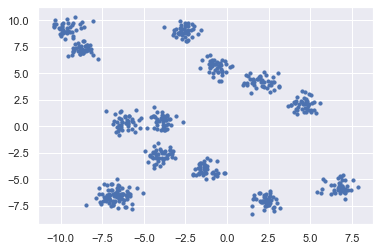

In [107]:
plt.scatter(X[:, 0], X[:, 1], s=10);

In [108]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage 
np.set_printoptions(precision=4, suppress=True) # presision are decimal points

In [109]:
distance = linkage(X, 'ward')  # base
#distance = linkage(X, 'centroid')

## Dendrogram

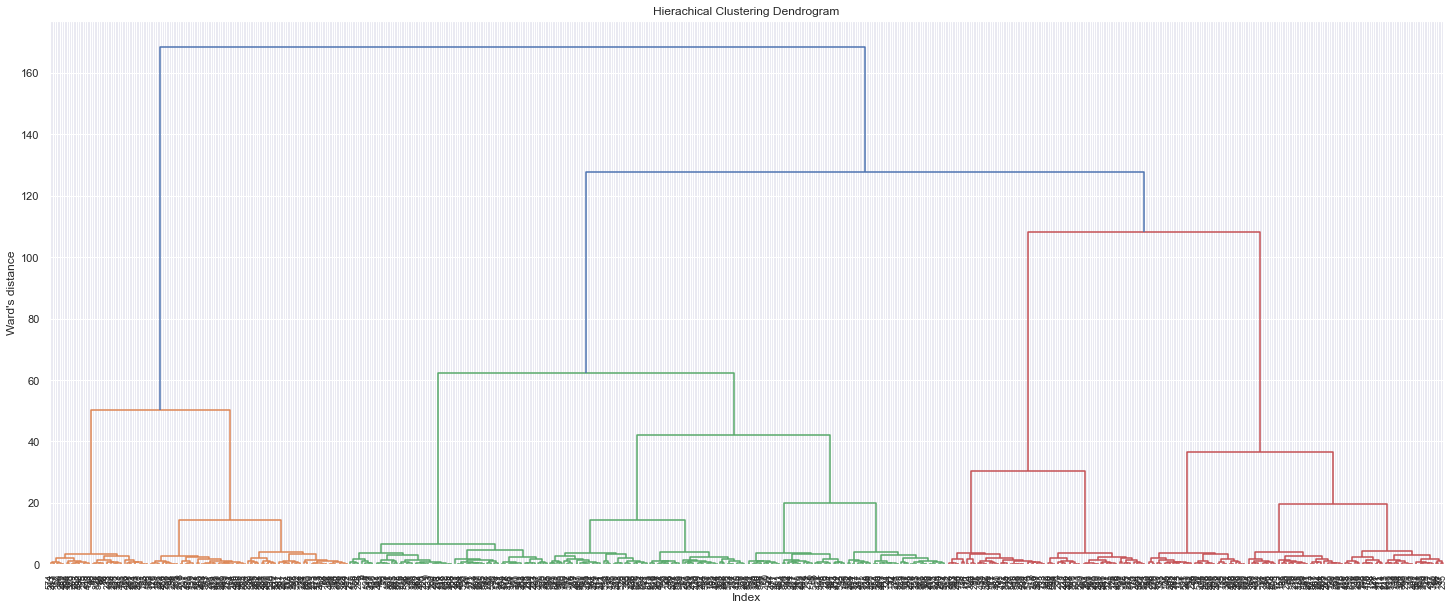

In [110]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance,
           leaf_rotation=90.,
           leaf_font_size=9.,);


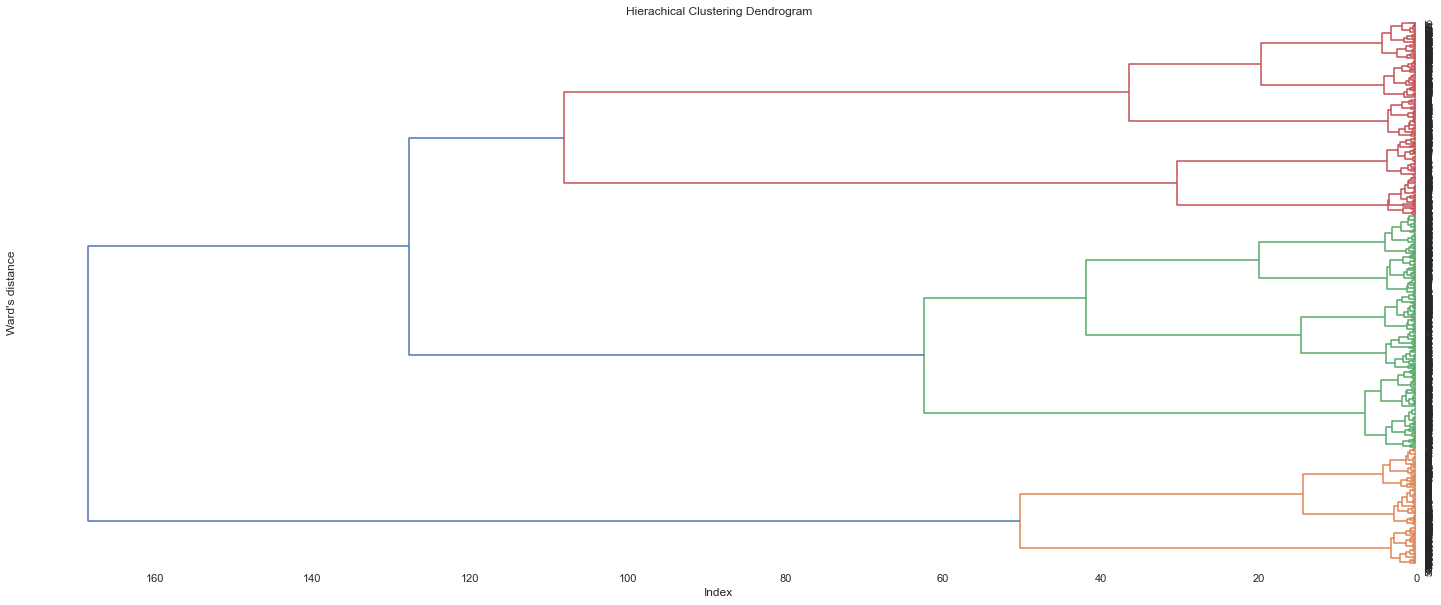

In [111]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance, orientation="left",
           leaf_rotation=90.,
           leaf_font_size=9.,);


# Truncating Dendrogram

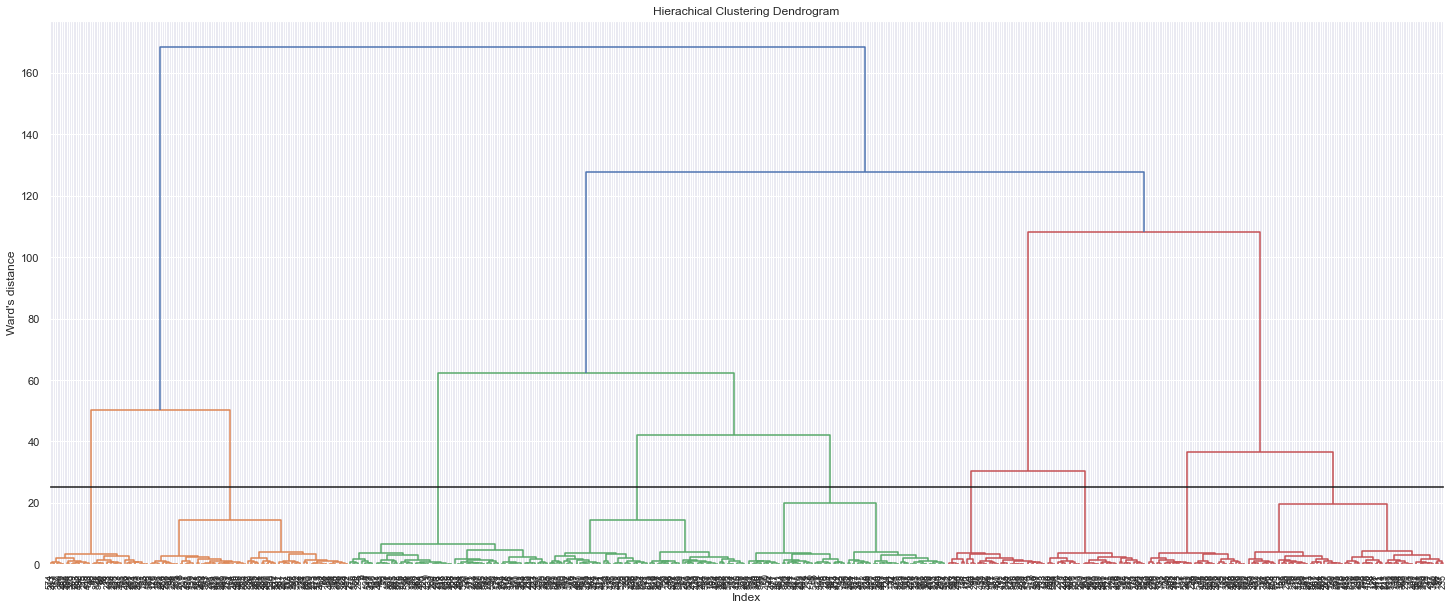

In [112]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance,
           leaf_rotation=90.,
           leaf_font_size=9.,);
plt.axhline(25, c='k'); # horizontal line drawn in black

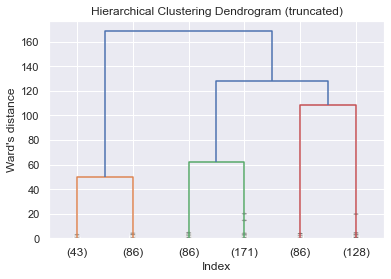

In [113]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Index')
plt.ylabel("Ward's distance")
dendrogram(distance, truncate_mode='lastp',
           p=6, leaf_rotation=0., leaf_font_size=12.,
           show_contracted=True);

### Retrieve the Clusters

By Retrieve we mean labeling the observations with the class somehow. The scipy library fcluster is the recomendation. 

* Utilise the [fcluster](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html) function.

* Retrieve by distance or number of clusters

### By distance

In [114]:
from scipy.cluster.hierarchy import fcluster
max_d = 25
clusters = fcluster(distance, max_d, criterion='distance')
clusters

array([5, 7, 5, 6, 3, 5, 3, 7, 2, 3, 9, 8, 5, 9, 4, 6, 4, 5, 9, 6, 2, 4,
       3, 4, 2, 2, 3, 4, 9, 4, 4, 3, 2, 5, 5, 7, 4, 6, 9, 4, 8, 6, 1, 8,
       5, 3, 1, 5, 2, 6, 9, 3, 1, 4, 4, 6, 7, 2, 6, 9, 9, 4, 8, 1, 2, 1,
       3, 5, 7, 5, 4, 9, 8, 3, 1, 1, 4, 6, 5, 8, 1, 3, 6, 2, 9, 5, 1, 9,
       9, 9, 8, 9, 2, 9, 7, 3, 8, 3, 9, 4, 3, 3, 4, 5, 9, 8, 4, 2, 5, 4,
       6, 3, 2, 3, 4, 9, 3, 5, 3, 2, 4, 2, 5, 9, 3, 9, 2, 9, 9, 3, 9, 8,
       2, 6, 6, 8, 1, 4, 5, 2, 1, 1, 6, 5, 6, 3, 9, 9, 3, 5, 4, 9, 8, 5,
       5, 3, 4, 9, 8, 4, 3, 7, 2, 6, 5, 5, 4, 4, 9, 6, 7, 3, 5, 8, 6, 2,
       9, 5, 9, 3, 8, 2, 3, 4, 4, 7, 9, 6, 3, 5, 1, 2, 1, 1, 3, 4, 1, 9,
       3, 9, 2, 2, 4, 8, 3, 5, 5, 4, 8, 1, 5, 9, 5, 4, 1, 9, 9, 3, 4, 9,
       3, 2, 4, 3, 2, 5, 2, 9, 8, 4, 3, 2, 7, 2, 1, 9, 3, 7, 1, 5, 2, 2,
       3, 4, 6, 3, 3, 9, 9, 1, 9, 4, 9, 5, 9, 1, 9, 4, 2, 9, 7, 1, 2, 9,
       4, 2, 2, 4, 4, 5, 2, 5, 3, 2, 2, 3, 8, 5, 9, 2, 2, 2, 3, 1, 9, 3,
       7, 6, 8, 1, 9, 2, 2, 3, 3, 2, 4, 7, 2, 3, 5,

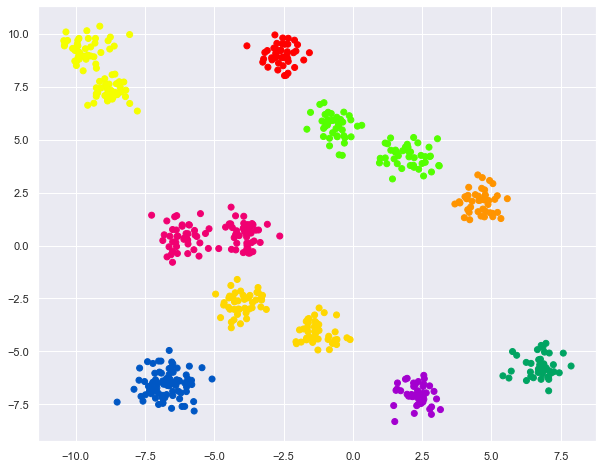

In [115]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism');

# By Clusters

In [123]:
k = 10
clusters = fcluster(distance, k, criterion='maxclust') 

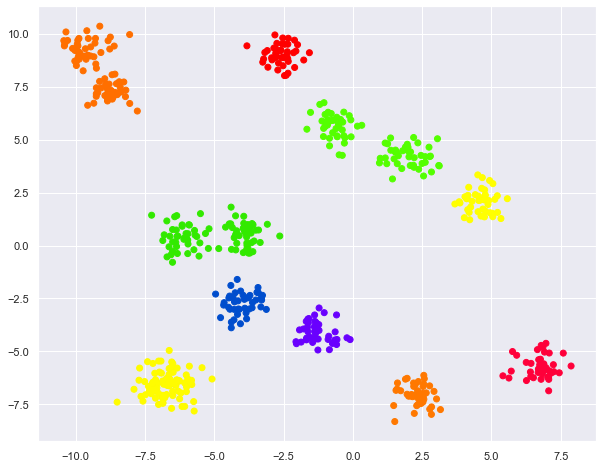

In [124]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism');

***

***

# k-Means Clustering


* Unsupervised method that Analyses and find patterns / clusters within data
* Distance measures

[scikit learn](http://scikit-learn.org/stable/modules/clustering.html#k-means)

* Clusters data by trying to separate samples in n groups of equal variance eg $SD^2$ 
* Minimizing a criterion known as the "inertia" or "within-cluster sum-of-squares". Trying to minimize the seperate groups of equal variance.
* Requires the number of clusters to be specified. 
* Scales well

How does it work?
* Divides a set of samples into disjoint clusters. Before hand you neeed to give it a target of clusters t owork towards.
* Each described by the mean of the samples in the cluster. 
* The means are commonly called the cluster “centroids”
* Note that the centroids are not, in general, points from, although they live in the same space. 
* The K-means algorithm aims to choose centroids that minimise the inertia, or **within-cluster sum of squared criterion**. Once it has identified the clusters, it tries to find a point which minimises the Sums of Square( deviation from the centroid; like Linear regression)


In [118]:
from sklearn.cluster import KMeans

In [119]:
kmeans = KMeans(n_clusters=5) # Instantiate the Classifier
kmeans.fit(X)

KMeans(n_clusters=5)

In [120]:
y_kmeans = kmeans.predict(X)

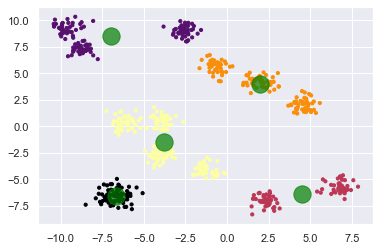

In [121]:
# visualise the dots
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='inferno') # c = centroid

# Visulaise the centroids
centers = kmeans.cluster_centers_ # 
plt.scatter(centers[:,0], centers[:,1], c='green', s=300, alpha=0.7);

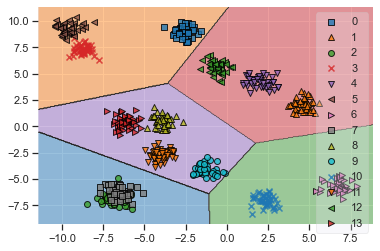

In [122]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=kmeans);

Some Challenges:

* The globally optimal result may not be achieved

* The number of clusters must be selected beforehand

* k-means is limited to linear cluster boundaries

* k-means can be slow for large numbers of samples

***
# Elbow Method

Becasue we are workign with an Unsupervised methods we don't have an answer , a Y. 

* Use intrinsic metrics - another name for "within-cluster Sums of Squared Error"
* An example fo this is the **within-cluster Sums of Squared Error** 
* scikit learn has already provided it via the kmeans `inertia_` attribute. So it will do the heavy lifting.

When we plot this on a line graph, there will be an elbow where the line bends sharply. This indicates where we can stop clustering because the **within-cluster Sums of Squared Error** is not giving us any more reduction.


In [125]:
kmeans.inertia_

4161.583079251808

In [137]:
sse_ = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, kmeans.inertia_])

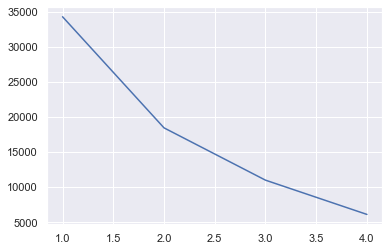

In [138]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);


***

# Silhouette Analysis
This is an alternative to the Elbow method. 

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of.The middle of one centroid to another.

$q$ is the mean intra-cluster distance to all the points in its own cluster. Intra-cluster means within the cluster, so the mean distance of all the distances within one cluster.

So $p-q$ will contrast the `p` inter cluster and the `q` intra-cluster. You want to minimsie p and maximise q so the top value of the fraction is as big as possible.
The $max(p,q)$ is to standardise it and get it closest to 1. 

* The value of the silhouette score range lies between -1 to 1. 
* A score closer to 1 indicates that the data point is very similar to other data points in the cluster. 
* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

example 
```py
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);
```
When you plot the silhouette scores for different kluster sizes, it will give you arch that presents a kind of ranking. This is more useful than the elbow method. 

In [139]:
from sklearn.metrics import silhouette_score

In [140]:
sse_ = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])

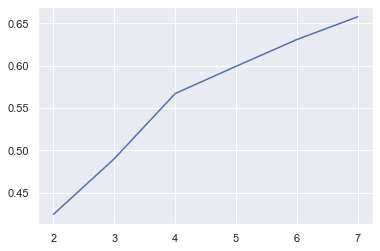

In [141]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

****

# Mean Shift


[wikipedia](https://en.wikipedia.org/wiki/Mean_shift)

* The basic intuition is [Non-parametric](https://en.wikipedia.org/wiki/Nonparametric_statistics)

* Identify centroids location

  * For each data point, it identifies a window around it
  * it then Computes centroid
  * Updates centroid location
  * Continue to update windows
  * Keep shifting the centroids, the means, towards the peaks of each cluster. Hence the term **Means Shift**
  * Continues until centroids no longer move

* Often used for object tracking

This Algorithm has a good ability to identify and locate the centroid of clusters.

In [142]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [143]:
from itertools import cycle

In [144]:
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X)) 

In [145]:
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=2.6896862536968045, bin_seeding=True)

In [146]:
cluster_centers = meanshift_model.cluster_centers_

In [147]:
print('\nCenters of clusters: \n', cluster_centers)


Centers of clusters: 
 [[-4.8181 -0.0728]
 [-6.7039 -6.5682]
 [-9.1797  8.2841]
 [ 0.6945  4.9192]
 [-2.6703 -3.4064]
 [ 3.3753  3.0801]
 [-1.8879  7.828 ]
 [ 6.745  -5.7347]
 [ 2.3083 -7.049 ]]


In [148]:
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print('\nNumber of clusters in input data =', num_clusters)


Number of clusters in input data = 9


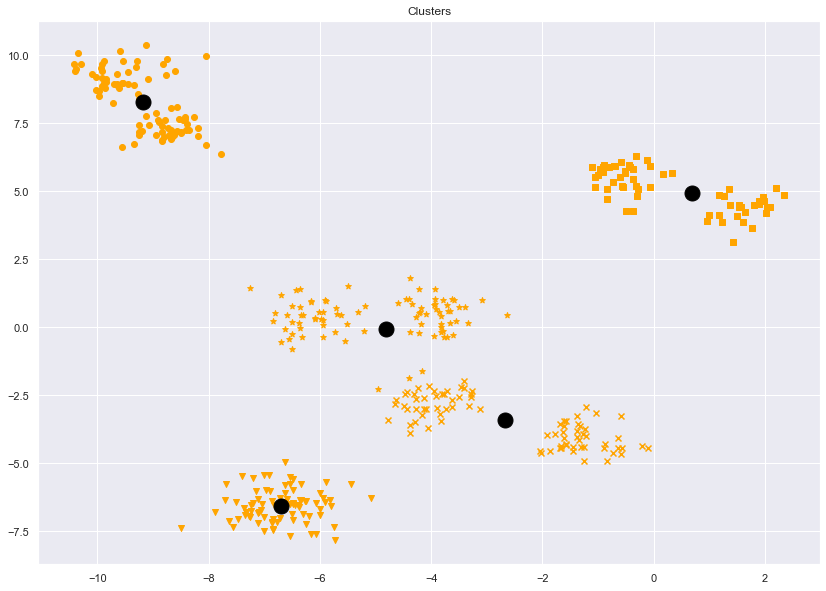

In [149]:
plt.figure(figsize=(14,10))
markers = '*vosx'
for i, marker in zip(range(num_clusters), markers):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='orange')
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o',  
             markerfacecolor='black', markeredgecolor='black',  
             markersize=15) 
plt.title('Clusters');

***